# Covid-19 Data Analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Dataviz
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

In [4]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
corona_list = pd.io.html.read_html(url)

In [5]:
corona_dframe = corona_list[0]

In [6]:
corona_dframe

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
0,NaN,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054
1,NaN,NaN,Albania,41.153300,20.168300,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275
2,NaN,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693
3,NaN,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955
4,NaN,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,...,870,871,874,874,874,875,878,878,878,878
262,NaN,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,...,1726,1728,1730,1734,1734,1760,1763,1768,1796,1797
263,NaN,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,...,378,378,386,386,386,388,388,396,396,399
264,NaN,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,...,7366,7409,7451,7495,7538,7583,7625,7665,7706,7706


In [7]:
corona_dframe.drop(['Lat','Long'],axis=1,inplace=True)

In [8]:
corona_dframe.head()

,Unnamed: 0,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
0,NaN,NaN,Afghanistan,0,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054
1,NaN,NaN,Albania,0,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275
2,NaN,NaN,Algeria,0,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693
3,NaN,NaN,Andorra,0,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955
4,NaN,NaN,Angola,0,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572


In [9]:
corona_dframe_agg = corona_dframe.groupby('Country/Region').sum()
corona_dframe_agg.head()

,Unnamed: 0,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054
Albania,0.0,0,0,0,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955
Angola,0.0,0,0,0,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572


In [10]:
corona_dframe_agg.shape

(188, 201)

In [11]:
corona_dframe_agg.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
lst = pd.io.html.read_html('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [13]:
recovered_df = lst[0]

In [14]:
recovered_df.drop(['Unnamed: 0', 'Lat', 'Long'], inplace=True, axis=1)

In [15]:
recovered_df2 = recovered_df.groupby('Country/Region').sum()

In [16]:
recovered_df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960
Albania,0,0,0,0,0,0,0,0,0,0,...,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268
Algeria,0,0,0,0,0,0,0,0,0,0,...,20082,20537,20988,21419,21901,22375,22802,23238,23667,24083
Andorra,0,0,0,0,0,0,0,0,0,0,...,806,807,807,807,821,825,825,828,839,839
Angola,0,0,0,0,0,0,0,0,0,0,...,395,437,460,461,476,503,506,520,544,564


In [17]:
lst2 = pd.io.html.read_html('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [18]:
death_df = lst2[0]

In [19]:
death_df.drop(['Unnamed: 0', 'Lat', 'Long'], inplace=True, axis=1)

In [20]:
death_df2 = death_df.groupby('Country/Region').sum()

In [21]:
death_df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312
Albania,0,0,0,0,0,0,0,0,0,0,...,154,157,161,166,172,176,182,188,189,193
Algeria,0,0,0,0,0,0,0,0,0,0,...,1200,1210,1223,1231,1239,1248,1261,1273,1282,1293
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
Angola,0,0,0,0,0,0,0,0,0,0,...,51,52,54,55,58,59,62,64,67,70


In [22]:
corona_dframe_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Columns: 200 entries, 1/22/20 to 8/8/20
dtypes: int64(200)
memory usage: 295.2+ KB


Text(0, 0.5, 'No. of cases')

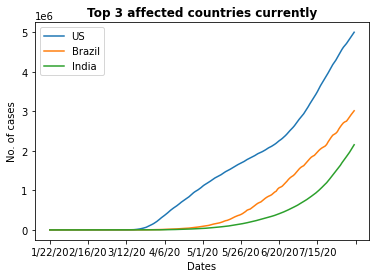

In [23]:
corona_dframe_agg.loc['US'].plot()
corona_dframe_agg.loc['Brazil'].plot()
corona_dframe_agg.loc['India'].plot()
plt.legend()
plt.title('Top 3 affected countries currently',weight='bold')
plt.xlabel('Dates')
plt.ylabel('No. of cases')

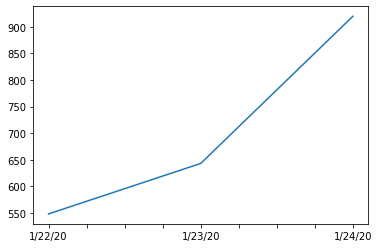

In [24]:
corona_dframe_agg.loc['China'][:3].plot()

Text(0, 0.5, 'No. of cases')

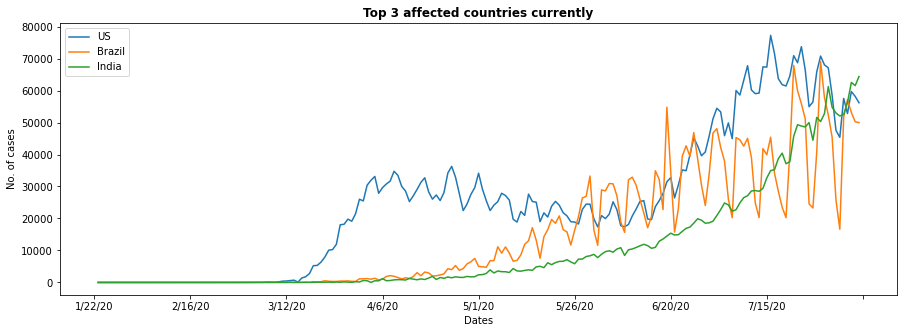

In [25]:
corona_dframe_agg.loc['US'].diff().plot(figsize=(15,5))
corona_dframe_agg.loc['Brazil'].diff().plot(figsize=(15,5))
corona_dframe_agg.loc['India'].diff().plot(figsize=(15,5))
plt.legend()
plt.title('Top 3 affected countries currently',weight='bold')
plt.xlabel('Dates')
plt.ylabel('No. of cases')

In [26]:
corona_dframe_agg_in = corona_dframe_agg.reset_index()
corona_dframe_agg_in.sort_values('8/8/20',ascending=False,inplace=True)
corona_dframe_agg_plot = corona_dframe_agg_in.head(15)

In [27]:
corona_dframe_agg_plot.iplot(kind='bar', x='Country/Region', y='8/8/20',
                             title='Total Cases Plot',xTitle='Countries',yTitle='Count (in Mil.)')

In [28]:
recovered_df2_in = recovered_df2.reset_index()
recovered_df2_in.sort_values('8/8/20',ascending=False,inplace=True)
recovered_df2_plot = recovered_df2_in.head(15)

In [29]:
recovered_df2_plot.iplot(kind='bar', x='Country/Region', y='8/8/20',color='green',
                         title='Recovered Cases Plot',xTitle='Countries',yTitle='Count (in Mil.)')

In [30]:
death_df2_in = death_df2.reset_index()
death_df2_in.sort_values('8/8/20',ascending=False,inplace=True)
death_df2_plot = death_df2_in.head(15)

In [31]:
death_df2_plot.iplot(kind='bar', x='Country/Region', y='8/8/20',color='red',
                    title='Death Cases Plot',xTitle='Countries',yTitle='Count (in Mil.)')

In [32]:
corona_dframe_agg.loc['US'].diff().max()

77255.0

In [33]:
corona_dframe_agg.loc['Brazil'].diff().max()

69074.0

In [34]:
corona_dframe_agg.loc['India'].diff().max()

64399.0

In [35]:
countries = list(corona_dframe_agg.index)
max_infection_rates = [corona_dframe_agg.loc[c].diff().max() for c in countries]

In [36]:
corona_dframe_agg['Max Infection Rates'] = max_infection_rates

In [37]:
corona_dframe_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,Max Infection Rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36675,36710,36710,36747,36782,36829,36896,37015,37054,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5276,5396,5519,5620,5750,5889,6016,6151,6275,139.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,30394,30950,31465,31972,32504,33055,33626,34155,34693,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,925,925,925,937,939,939,944,955,955,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1148,1164,1199,1280,1344,1395,1483,1538,1572,88.0


In [38]:
cleaned_corona_dframe = DataFrame(corona_dframe_agg['Max Infection Rates'])
cleaned_corona_dframe.head()

,Max Infection Rates
Country/Region,
Afghanistan,915.0
Albania,139.0
Algeria,675.0
Andorra,79.0
Angola,88.0


In [39]:
happiness_dframe = pd.read_csv('worldwide_happiness_report.csv')

In [40]:
happiness_dframe.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [41]:
drop_cols = ['Overall rank','Generosity','Score','Perceptions of corruption']

In [42]:
happiness_dframe.drop(drop_cols,axis=1,inplace=True)

In [43]:
happiness_dframe.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [44]:
happiness_dframe.set_index('Country or region',inplace=True)

In [45]:
happiness_dframe.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [46]:
cleaned_corona_dframe.shape

(188, 1)

In [47]:
happiness_dframe.shape

(156, 4)

In [48]:
countries_dframe = cleaned_corona_dframe.join(happiness_dframe,how='inner')

Here as number of countries in corona dataset were greater than those in happiness dataset so we use inner join, as inner join takes intersection of the two datasets

In [49]:
countries_dframe.head()

,Max Infection Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,139.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7513.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


In [50]:
corr_countries_dframe = countries_dframe.corr()

In [51]:
corr_countries_dframe

,Max Infection Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max Infection Rates,1.000000,0.102561,0.071105,0.090523,0.087677
GDP per capita,0.102561,1.000000,0.757521,0.859431,0.394799
Social support,0.071105,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.090523,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.087677,0.394799,0.456317,0.423146,1.000000


In [52]:
x = countries_dframe['GDP per capita']
y = countries_dframe['Max Infection Rates']
y = np.log(y)

#### Max Infection Rates vs GDP per capita	

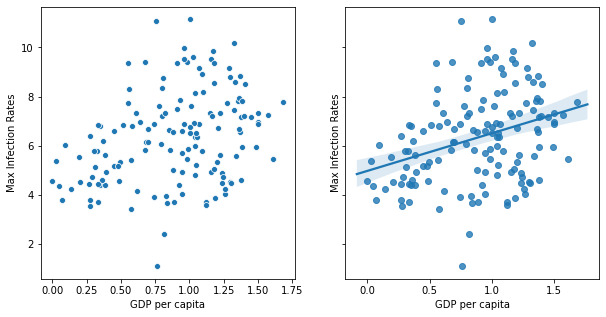

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.scatterplot(x, y, ax=ax1)
sns.regplot(x, y, ax=ax2)

In [54]:
x = countries_dframe['Social support']

#### Max Infection Rates vs Social support	

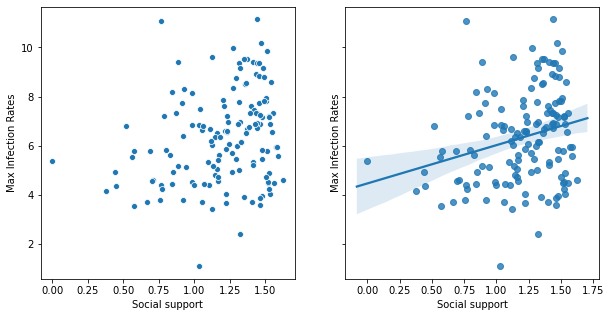

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.scatterplot(x, y, ax=ax1)
sns.regplot(x, y, ax=ax2)

In [56]:
x = countries_dframe['Healthy life expectancy']

#### Max Infection Rates vs Healthy life expectancy

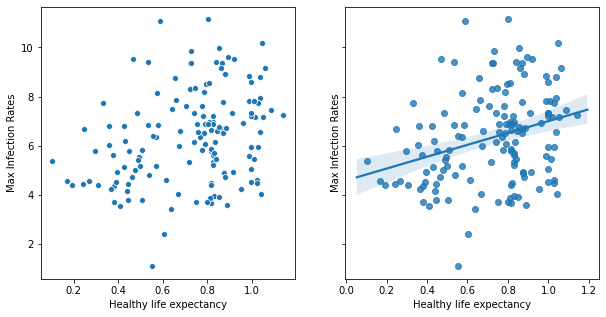

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.scatterplot(x, y, ax=ax1)
sns.regplot(x, y, ax=ax2)

In [58]:
x = countries_dframe['Freedom to make life choices']

#### Max Infection Rates vs Freedom to make life choices

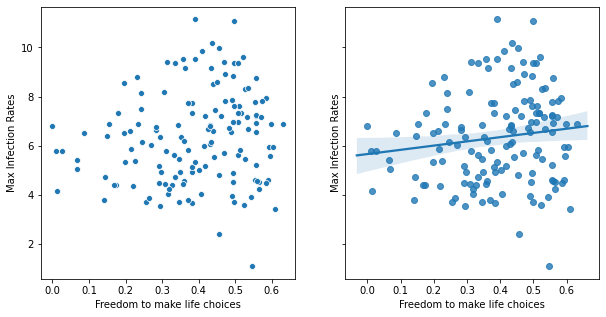

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.scatterplot(x, y, ax=ax1)
sns.regplot(x, y, ax=ax2)

Out of the all four factors Max Infection Rates is most strongly correlated to GDP per capita, even though the correlation is low but out of the four it is the most important factor.<br />
A rather intresting find is that next follwed best correlation is against Healthy life expectancy, it felt kind of wierd to see that the countries with Healthy life expectancy are somewhat correlated to Max Infection Rates.<br />
Whereas the least correlated factor was Freedom to make life choices.<br />
Although all the correlations were less than 0.200000

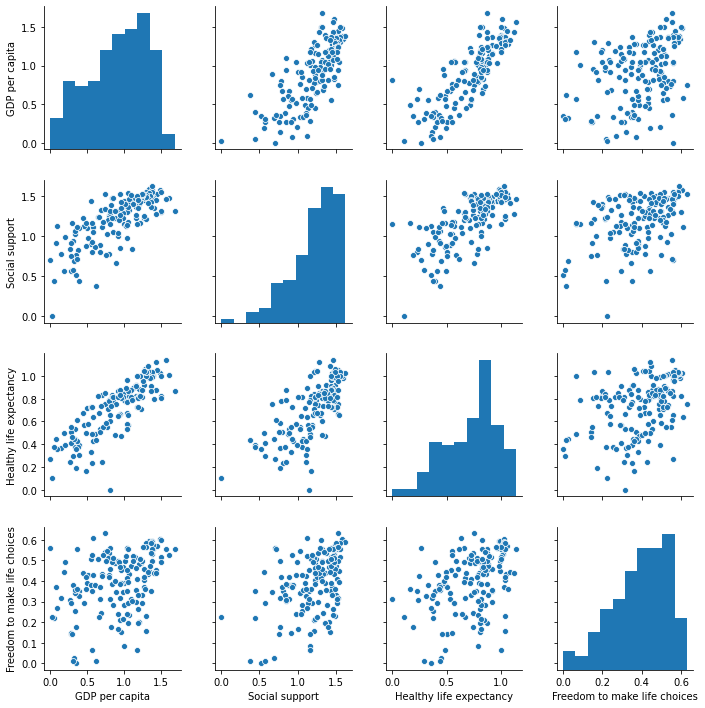

In [60]:
sns.pairplot(happiness_dframe.dropna())

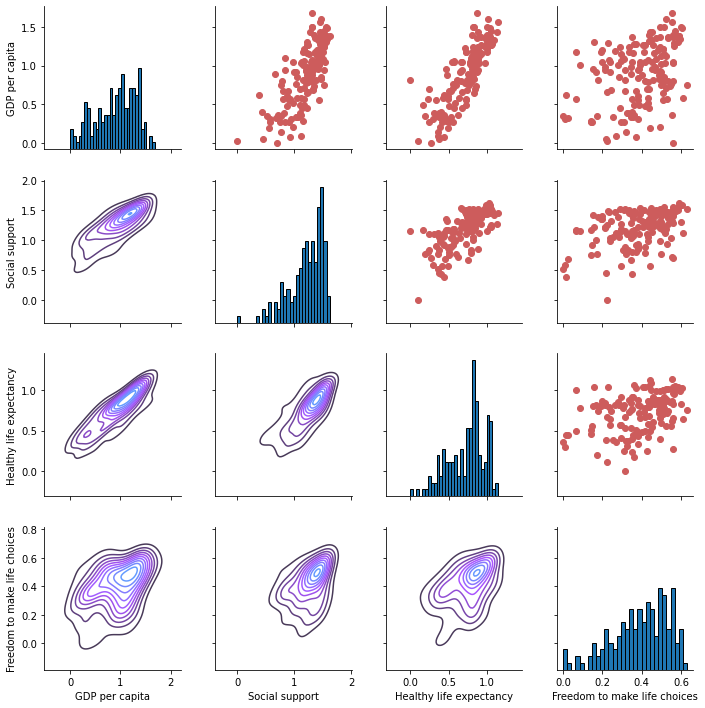

In [61]:
returns_fig = sns.PairGrid(happiness_dframe.dropna())

returns_fig.map_upper(plt.scatter,color='indianred')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30,edgecolor='black')

Here we can see that Healthy life expectancy is strongly correlated with GDP per capita and Social Support.

# Done!